die ersten 2 blocks kannst du weglassen

In [1]:
import numpy as np
import os
from skimage.io import imread
from glob import glob
import sys


# Current folder as project_root
# Going three layers of folders upwards to src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_dir      = os.path.join(project_root)

# Add the src directory to the Python module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Import functions for loading images
from src.imread_all import load_nih3t3_images, load_n2dl_hela_images, load_n2dh_gowt1_images


# Load images and ground-truth masks from the datasets
imgs_N2DH_GOWT1, gts_N2DH_GOWT1, img_paths_N2DH_GOWT1, gt_paths_N2DH_GOWT1 = load_n2dh_gowt1_images(base_path=os.path.join(project_root, "data-git", "N2DH-GOWT1"))
imgs_N2DL_HeLa, gts_N2DL_HeLa, img_paths_N2DL_HeLa, gt_paths_N2DL_HeLa = load_n2dl_hela_images(base_path=os.path.join(project_root, "data-git", "N2DL-HeLa"))
imgs_NIH3T3, gts_NIH3T3, img_paths_NIH3T3, gt_paths_NIH3T3 = load_nih3t3_images(base_path=os.path.join(project_root, "data-git", "NIH3T3"))



In [2]:
from src.Dice_Score_comparison import calculate_dice_scores_global
from src.show_imgs import plot_images_side_by_side
from src.find_image import find_and_load_image
from src.pre_processing import gammacorrection

img_gowt1 = imread((os.path.join(project_root,"data-git","N2DH-GOWT1", "img", "t01.tif")), as_gray=True)

# Compute Dice scores for each dataset
dice_all_gowt1_global = calculate_dice_scores_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_global = calculate_dice_scores_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_global = calculate_dice_scores_global(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_global = [float(score) for score in dice_all_gowt1_global]
dice_all_hela_global = [float(score) for score in dice_all_hela_global]
dice_all_nih_global = [float(score) for score in dice_all_nih_global]

# vector with all Dice scores with our Otsu Global
dice_all_global = dice_all_gowt1_global + dice_all_hela_global + dice_all_nih_global

GAMMA

one of our methods etc. 
equation: 
gamma value 0.6 was used because it shows best mean performance. See data-preprocessing/Optimization/gamma.
here an example of what it does:

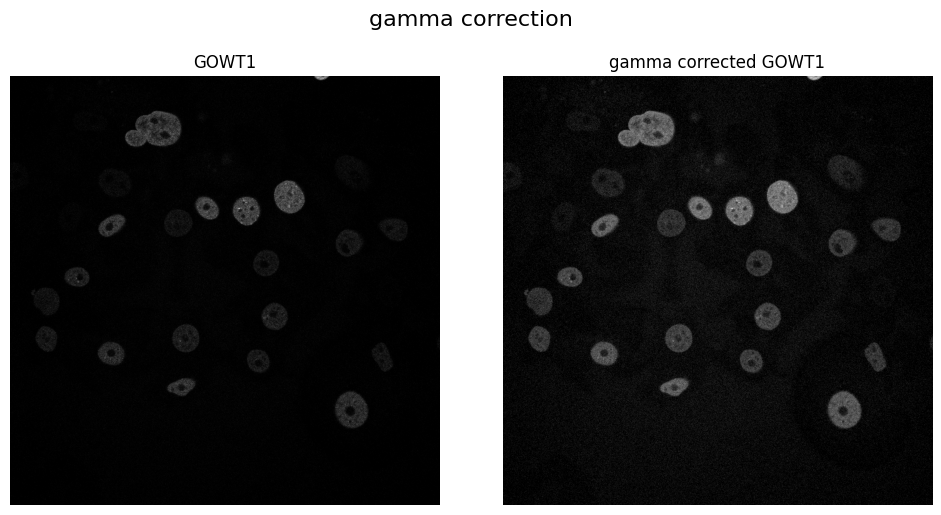

In [3]:
#-----------------
# GAMMA CORRECTION
#-----------------

img_gowt1_gamma = gammacorrection(img_gowt1, gamma=0.6)

images_gamma = [img_gowt1, img_gowt1_gamma]
titles_img_gamma = ["GOWT1", "gamma corrected GOWT1"]

plot_images_side_by_side(images_gamma, titles=titles_img_gamma, main_title="gamma correction")

When applied before segmentation can strongly enhance performance. To find out the best gamma value, following code is used.

In [4]:
from src.optimization_gamma import evaluate_datasets_gamma, find_best_gamma, plot_mean_dice_vs_gamma

if __name__ == '__main__':
    gamma_values = np.arange(0.1, 2.1, 0.1)
    datasets = [
        ('N2DH-GOWT1', load_n2dh_gowt1_images),
        ('N2DL-HeLa', load_n2dl_hela_images),
        ('NIH3T3',  load_nih3t3_images),
    ]

    all_means_gamma = evaluate_datasets_gamma(datasets, gamma_values, path= project_root)

    best_gamma, best_dice = find_best_gamma(all_means_gamma, gamma_values)
    print(f"Optimal gamma value: {best_gamma:.2f}  Mean Dice = {best_dice:.4f}")

    dataset_names = [name for name, _ in datasets]
    plot_mean_dice_vs_gamma(gamma_values, all_means_gamma, dataset_names, y=best_gamma)

=== Processing N2DH-GOWT1 ===
Gamma 0.10 → Mean Dice: 0.2934
Gamma 0.20 → Mean Dice: 0.2934
Gamma 0.30 → Mean Dice: 0.2934
Gamma 0.40 → Mean Dice: 0.2934
Gamma 0.50 → Mean Dice: 0.4482
Gamma 0.60 → Mean Dice: 0.6783
Gamma 0.70 → Mean Dice: 0.6879
Gamma 0.80 → Mean Dice: 0.6401
Gamma 0.90 → Mean Dice: 0.5958
Gamma 1.00 → Mean Dice: 0.5471
Gamma 1.10 → Mean Dice: 0.4716
Gamma 1.20 → Mean Dice: 0.4440
Gamma 1.30 → Mean Dice: 0.3843
Gamma 1.40 → Mean Dice: 0.3571
Gamma 1.50 → Mean Dice: 0.3164
Gamma 1.60 → Mean Dice: 0.3009
Gamma 1.70 → Mean Dice: 0.2712
Gamma 1.80 → Mean Dice: 0.2441
Gamma 1.90 → Mean Dice: 0.2359
Gamma 2.00 → Mean Dice: 0.2152
=== Processing N2DL-HeLa ===
Gamma 0.10 → Mean Dice: 0.8865
Gamma 0.20 → Mean Dice: 0.8828
Gamma 0.30 → Mean Dice: 0.8753
Gamma 0.40 → Mean Dice: 0.8623
Gamma 0.50 → Mean Dice: 0.8453
Gamma 0.60 → Mean Dice: 0.8238
Gamma 0.70 → Mean Dice: 0.7966
Gamma 0.80 → Mean Dice: 0.7738
Gamma 0.90 → Mean Dice: 0.7441
Gamma 1.00 → Mean Dice: 0.7164
Gamma 1.10 

KeyboardInterrupt: 

In [ ]:


# import function for gamma correction + global otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_global

# apply gamma correction and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_global = calculate_dice_scores_gamma_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_global = calculate_dice_scores_gamma_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_global = calculate_dice_scores_gamma_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of gamma correction + global otsu thresholding
all_dice_scores_gamma_global =  dice_scores_N2DH_GOWT1_gamma_global + dice_scores_N2DL_HeLa_gamma_global + dice_scores_NIH3T3_gamma_global 



here you see how much better with gamma....

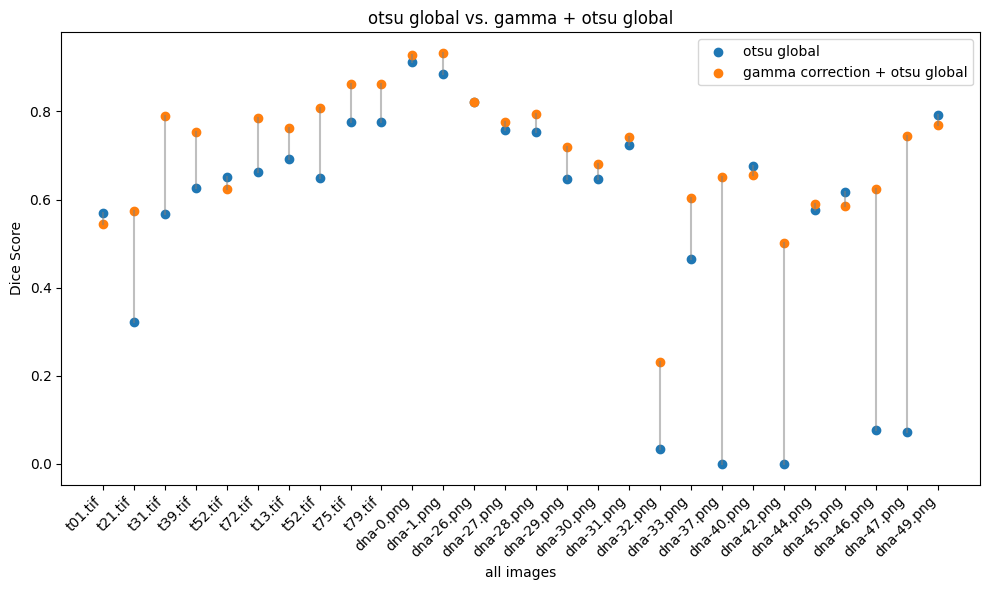

In [ ]:
from src.Plots import plot_pairwise_scores

# Spaghetti plot gamma correction + otsu global
# Datasets
labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_global, 
                     labels=labels, 
                     title= "otsu global vs. gamma + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "gamma correction + otsu global")  )

Histogram equalization


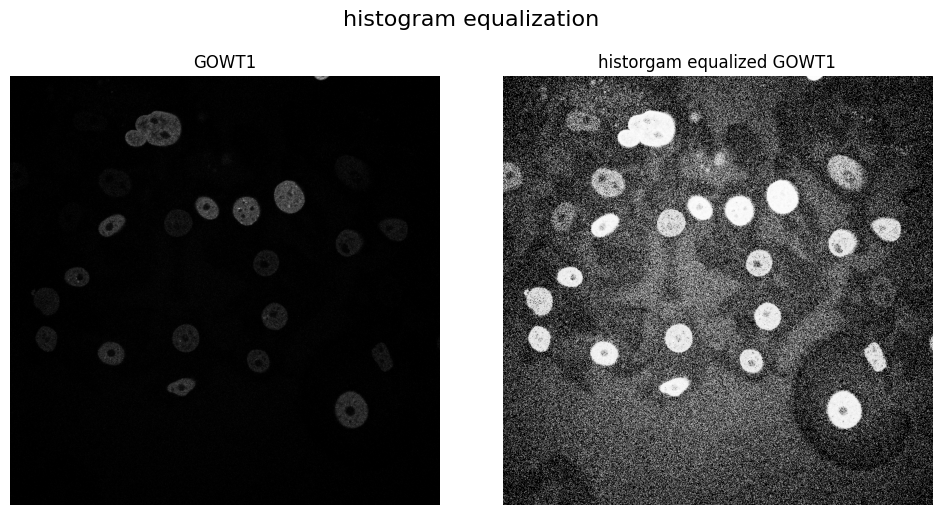

In [ ]:
from src.pre_processing import histogramequalization

img_gowt1_histeq = histogramequalization(img_gowt1)

images_histeq = [img_gowt1, img_gowt1_histeq]
titles_img_histeq = ["GOWT1", "historgam equalized GOWT1"]

plot_images_side_by_side(images_histeq, titles=titles_img_histeq, main_title="histogram equalization")



In [ ]:
from src.Dice_Score_comparison import calculate_dice_scores_histeq_global

# apply histogram equalization and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_histeq_global = calculate_dice_scores_histeq_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_histeq_global = calculate_dice_scores_histeq_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_histeq_global = calculate_dice_scores_histeq_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of histogram equalization + global otsu thresholding
all_dice_scores_histeq_global =  dice_scores_N2DH_GOWT1_histeq_global + dice_scores_N2DL_HeLa_histeq_global + dice_scores_NIH3T3_histeq_global

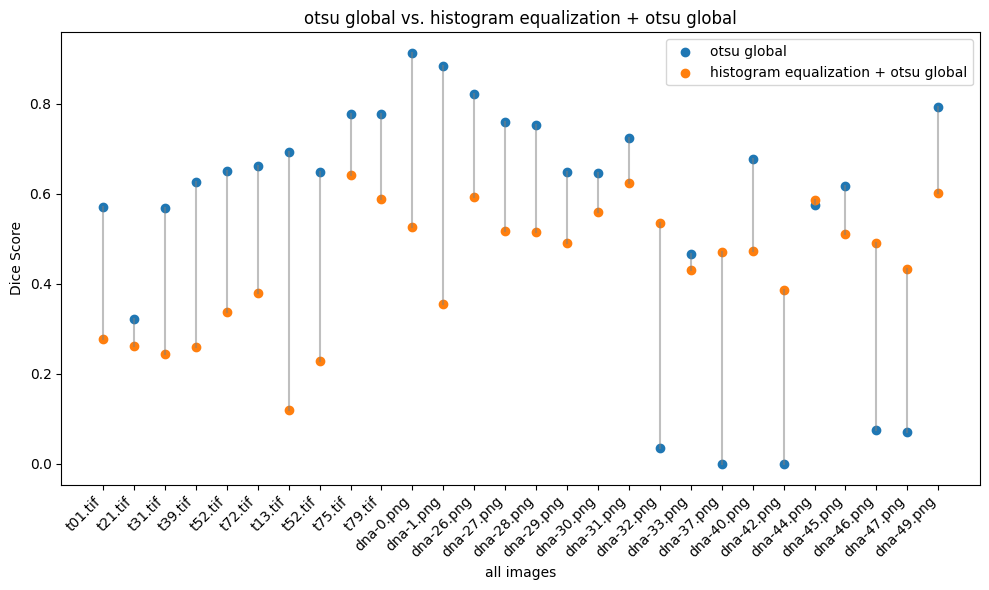

In [ ]:
# Define indices for the labels of the later x-axis 
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_histeq_global, 
                     labels=labels, 
                     title= "otsu global vs. histogram equalization + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "histogram equalization + otsu global")  )

often worse because of enhanced uneven illumination and noise

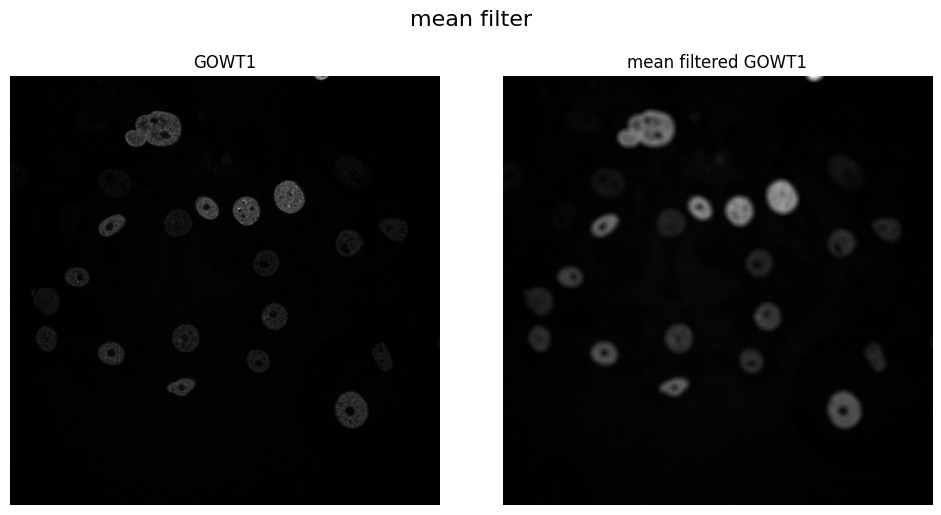

In [ ]:
from src.pre_processing import mean_filter

img_gowt1_filtered = mean_filter(img_gowt1)

images_filtered = [img_gowt1, img_gowt1_filtered]
titles_img_filtered = ["GOWT1", "mean filtered GOWT1"]

plot_images_side_by_side(images_filtered, titles=titles_img_filtered, main_title="mean filter")


In [ ]:
from src.Dice_Score_comparison import calculate_dice_scores_meanfilter_global

# apply mean filter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of mean filter + global otsu thresholding
all_dice_scores_meanfilter_global =  dice_scores_N2DH_GOWT1_meanfilter_global + dice_scores_N2DL_HeLa_meanfilter_global + dice_scores_NIH3T3_meanfilter_global

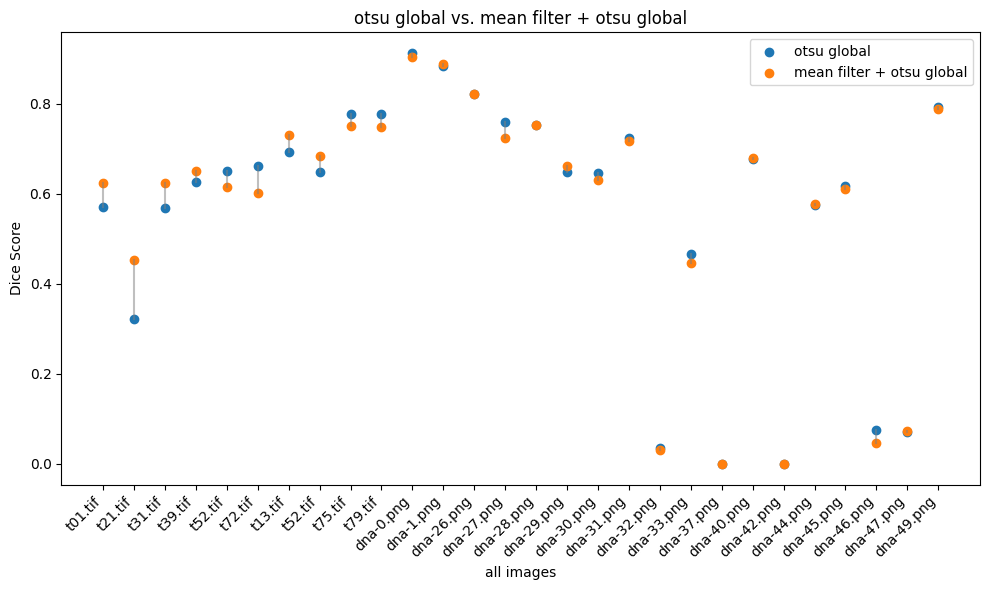

In [ ]:
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_meanfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. mean filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "mean filter + otsu global")  )

wienerfilter

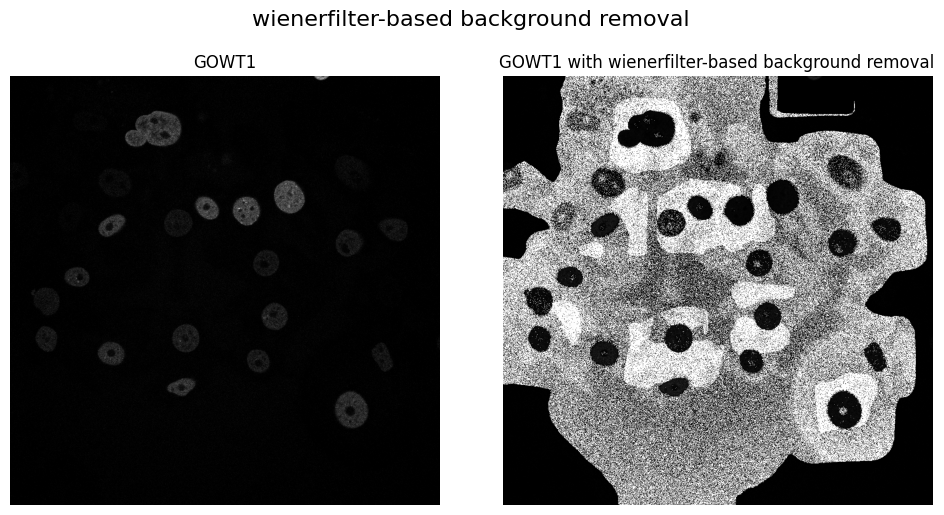

In [ ]:
from src.pre_processing import local_wiener_filter

background = local_wiener_filter(img_gowt1)
img_gowt1_wiener = img_gowt1 - background


images_wiener = [img_gowt1, img_gowt1_wiener]
titles_img_wiener = ["GOWT1", "GOWT1 with wienerfilter-based background removal"]

plot_images_side_by_side(images_wiener, titles=titles_img_wiener, main_title="wienerfilter-based background removal")


In [ ]:
from src.Dice_Score_comparison import calculate_dice_scores_wienerfilter_global

# apply wiener filter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of wiener filter + global otsu thresholding
all_dice_scores_wienerfilter_global =  dice_scores_N2DH_GOWT1_wienerfilter_global + dice_scores_N2DL_HeLa_wienerfilter_global + dice_scores_NIH3T3_wienerfilter_global

# save the output
np.save(os.path.join(project_root, "output", "all_dice_scores_wienerfilter"), all_dice_scores_wienerfilter_global)

KeyboardInterrupt: 

In [ ]:
# the dice scores were be calculated with code above (takes around 40 min)

# load the saved dice scores from above
all_dice_scores_wienerfilter_global = np.load(os.path.join(project_root, "output", "all_dice_scores_wienerfilter.npy"))


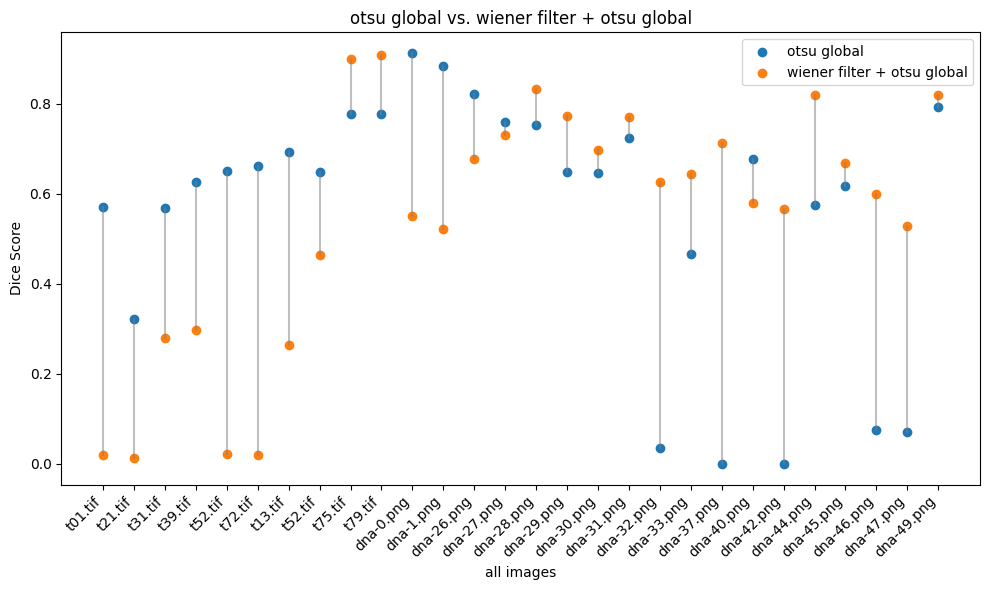

In [ ]:
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_wienerfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. wiener filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "wiener filter + otsu global")  )

# NOW MEANFILTER WITH GAMMA CORRECTION

In [ ]:
from src.Dice_Score_comparison import calculate_dice_scores_gamma_meanfilter_global

# apply gamma_meanfilter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of gamma_meanfilter + global otsu thresholding
all_dice_scores_gamma_meanfilter_global =  dice_scores_N2DH_GOWT1_gamma_meanfilter_global + dice_scores_N2DL_HeLa_gamma_meanfilter_global + dice_scores_NIH3T3_gamma_meanfilter_global

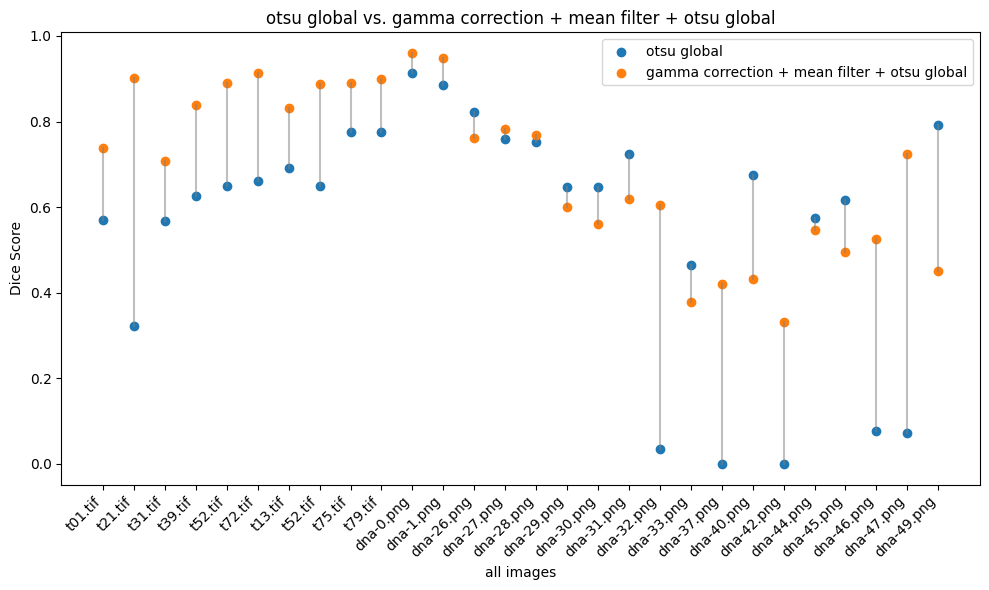

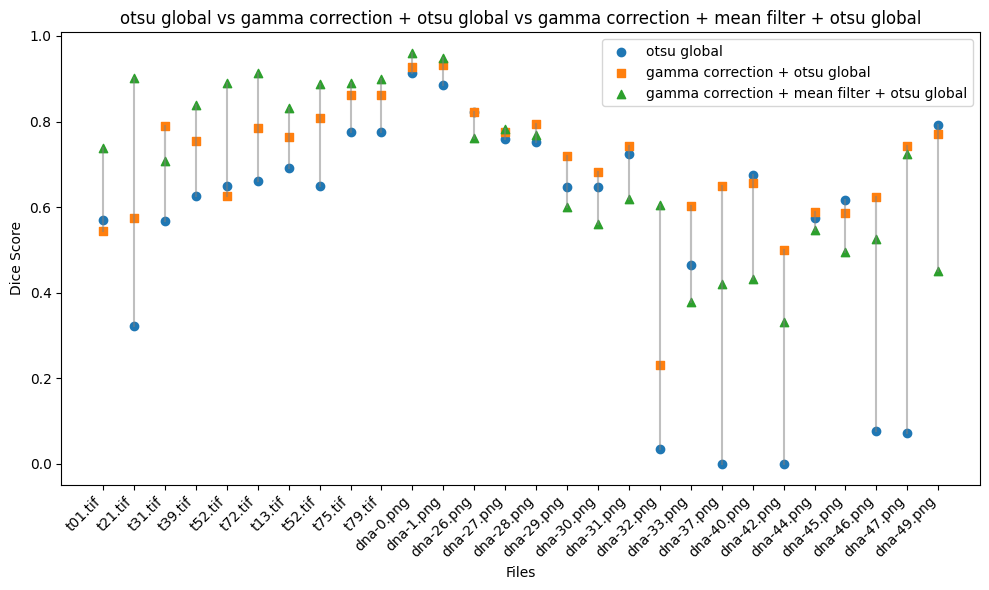

In [ ]:
from src.Plots import plot_pairwise_scores, plot_triplet_scores

# Spaghetti plot gamma correction + otsu global
# Datasets
labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_meanfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. gamma correction + mean filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "gamma correction + mean filter + otsu global")  )

plot_triplet_scores(file_names, dice_all_global, all_dice_scores_gamma_global, all_dice_scores_gamma_meanfilter_global,
                    labels=labels,
                    legend_labels=("otsu global", "gamma correction + otsu global", "gamma correction + mean filter + otsu global"),
                    title="otsu global vs gamma correction + otsu global vs gamma correction + mean filter + otsu global" )

# MEDIAN WINDOW SIZES: GLOBAL vs LOCAL PLOT

In [5]:
# load otsu local dice scores
# import function for local otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_local_package

# apply local otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_local = calculate_dice_scores_local_package(imgs_NIH3T3, gts_NIH3T3, radius= 150)
dice_scores_N2DL_HeLa_local = calculate_dice_scores_local_package(imgs_N2DL_HeLa, gts_N2DL_HeLa, radius= 125)
dice_scores_N2DH_GOWT1_local = calculate_dice_scores_local_package(imgs_N2DH_GOWT1, gts_N2DH_GOWT1, radius=450 )

# vector with all dice score of local otsu thresholding
all_dice_scores_local =  dice_scores_N2DH_GOWT1_local + dice_scores_N2DL_HeLa_local + dice_scores_NIH3T3_local


3.47%


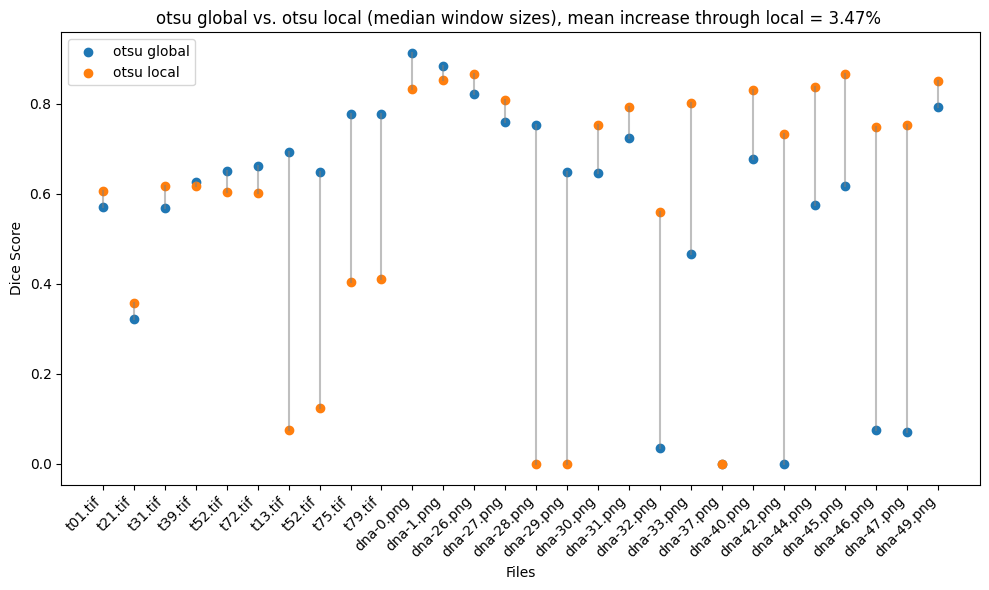

In [ ]:
# percentage increase of dice score
mean_increase_global_local = (np.mean(np.array(all_dice_scores_local))-np.mean(np.array(dice_all_global)))/np.mean(np.array(dice_all_global))
print(f"{mean_increase_global_local * 100:.2f}%")  


# spaghetti plot
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_local,
                      labels=labels,
                        title=f"otsu global vs. otsu local (median window sizes), mean increase through local = {mean_increase_global_local* 100:.2f}% ",
                          legend_labels=("otsu global", "otsu local"))

In [6]:
from src.Dice_Score_comparison import calculate_dice_scores_gamma_meanfilter_local_package

# apply gamma_meanfilter and local_package otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_meanfilter_local_package = calculate_dice_scores_gamma_meanfilter_local_package(imgs_NIH3T3, gts_NIH3T3,  radius=150)
dice_scores_N2DL_HeLa_gamma_meanfilter_local_package = calculate_dice_scores_gamma_meanfilter_local_package(imgs_N2DL_HeLa, gts_N2DL_HeLa, radius=125)
dice_scores_N2DH_GOWT1_gamma_meanfilter_local_package = calculate_dice_scores_gamma_meanfilter_local_package(imgs_N2DH_GOWT1, gts_N2DH_GOWT1, radius=450)

# vector with all dice score of gamma_meanfilter + local_package otsu thresholding
all_dice_scores_gamma_meanfilter_local_package =  dice_scores_N2DH_GOWT1_gamma_meanfilter_local_package + dice_scores_N2DL_HeLa_gamma_meanfilter_local_package + dice_scores_NIH3T3_gamma_meanfilter_local_package

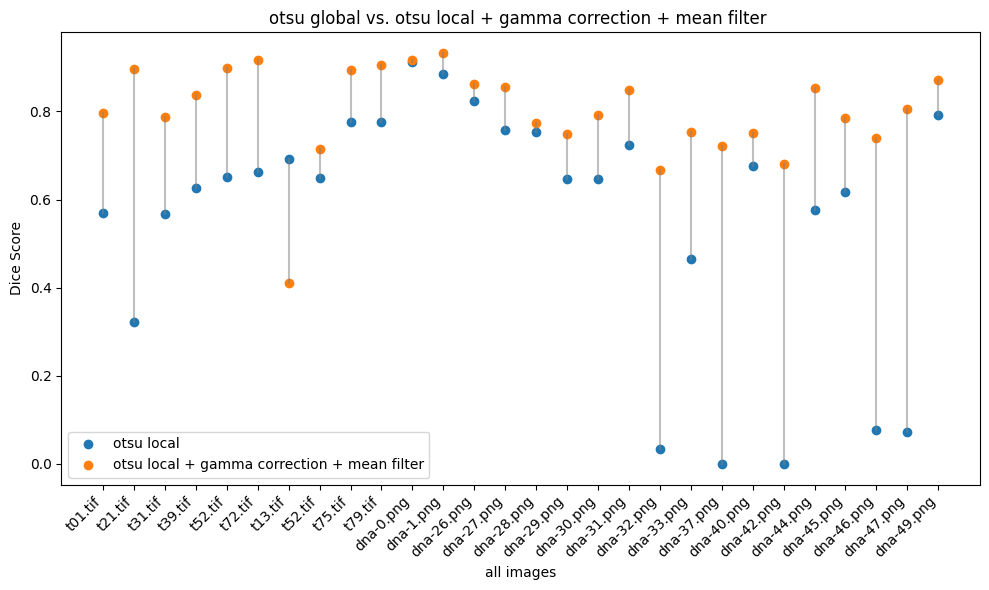

In [9]:
from src.Plots import plot_pairwise_scores

labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_meanfilter_local_package, 
                     labels=labels, 
                     title= "otsu global vs. otsu local + gamma correction + mean filter ", 
                     xlabel="all images", 
                     legend_labels=("otsu local", "otsu local + gamma correction + mean filter")  )

# spaghetti plot mit global, global + gamma, local, local + gamma WITH MEAN

In [10]:
# import function for gamma correction + local otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_local_package

# apply gamma correction and local otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_local = calculate_dice_scores_gamma_local_package(imgs_NIH3T3, gts_NIH3T3, radius= 150)
dice_scores_N2DL_HeLa_gamma_local = calculate_dice_scores_gamma_local_package(imgs_N2DL_HeLa, gts_N2DL_HeLa, radius= 125)
dice_scores_N2DH_GOWT1_gamma_local = calculate_dice_scores_gamma_local_package(imgs_N2DH_GOWT1, gts_N2DH_GOWT1, radius=450 )

# vector with all dice score of gamma correction + local otsu thresholding
all_dice_scores_gamma_local =  dice_scores_N2DH_GOWT1_gamma_local + dice_scores_N2DL_HeLa_gamma_local + dice_scores_NIH3T3_gamma_local

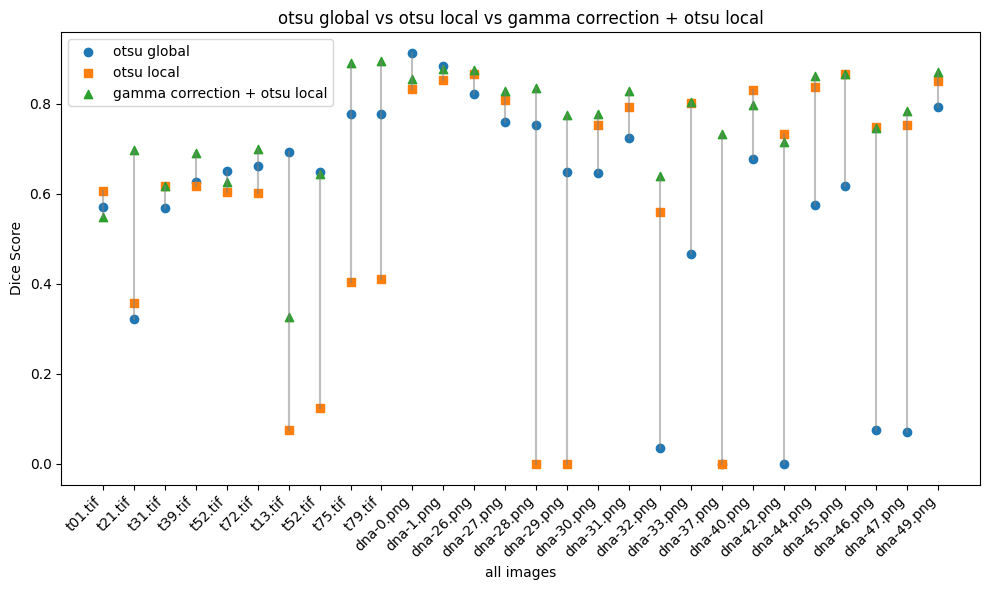

In [ ]:
from src.Plots import plot_triplet_scores


# spaghetti plot
plot_triplet_scores(file_names, dice_all_global, all_dice_scores_local, all_dice_scores_gamma_local, 
                     labels=labels, 
                     title= f"otsu global vs otsu local vs gamma correction + otsu local", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "otsu local",  "gamma correction + otsu local")  )

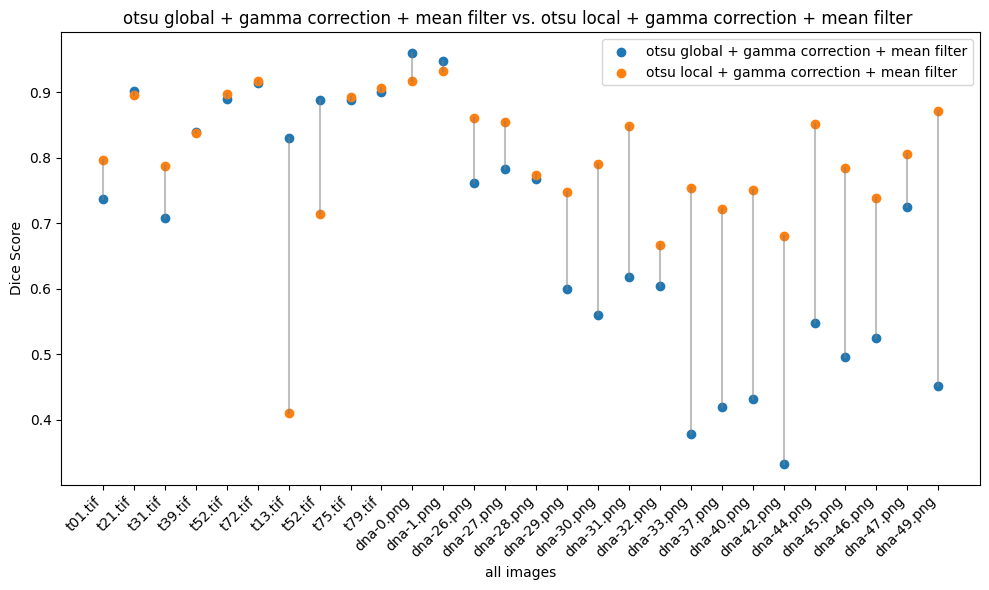

In [14]:
from src.Plots import plot_pairwise_scores

labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, all_dice_scores_gamma_meanfilter_global, all_dice_scores_gamma_meanfilter_local_package, 
                     labels=labels, 
                     title= "otsu global + gamma correction + mean filter vs. otsu local + gamma correction + mean filter ", 
                     xlabel="all images", 
                     legend_labels=("otsu global + gamma correction + mean filter", "otsu local + gamma correction + mean filter")  )

In [ ]:
plot_pairwise_scores(file_names, , all_dice_scores_gamma_meanfilter_local_package, 
                     labels=labels, 
                     title= "otsu local + gamma correction vs. otsu local + gamma correction + mean filter ", 
                     xlabel="all images", 
                     legend_labels=("otsu local + gamma correction", "otsu local + gamma correction + mean filter")  )

33.93%


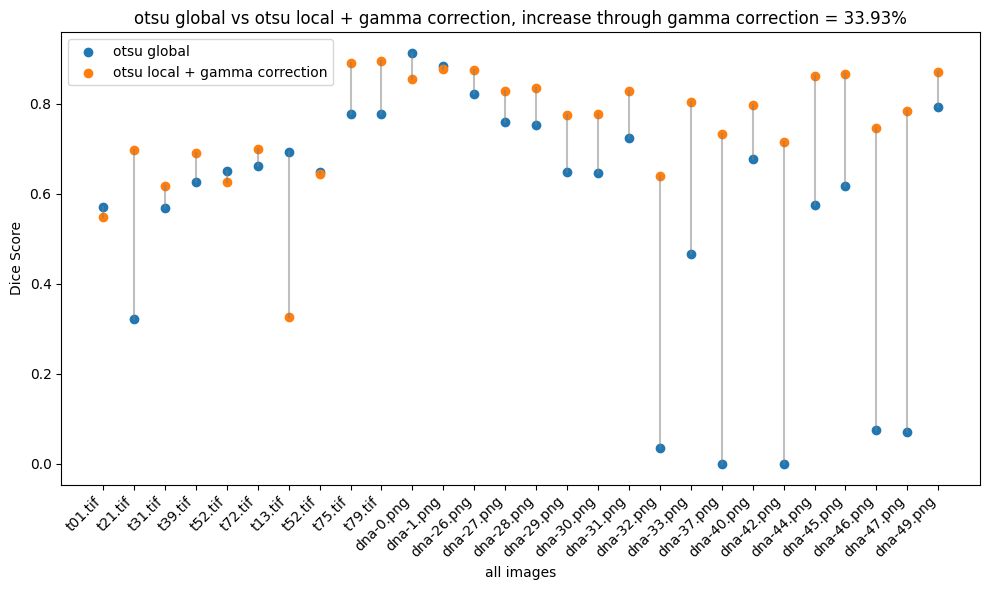

In [ ]:
from src.Plots import plot_pairwise_scores

# percentage increase of dice score: global vs gamma+local
mean_increase_global_gammalocal = (np.mean(np.array(all_dice_scores_gamma_local))-np.mean(np.array(dice_all_global)))/np.mean(np.array(dice_all_global))
print(f"{mean_increase_global_gammalocal * 100:.2f}%")  

# spaghetti plot
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_local, 
                     labels=labels, 
                     title= f"otsu global vs otsu local + gamma correction, increase through gamma correction = {mean_increase_global_gammalocal * 100:.2f}%", 
                     xlabel="all images", 
                     legend_labels=("otsu global",  "otsu local + gamma correction")  )

# spaghetti plot mit global, global + gamma, local, local + gamma WITH MEDIAN

In [ ]:
# import function for gamma correction + local otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_local_package

# apply gamma correction and local otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_local_median = calculate_dice_scores_gamma_local_package(imgs_NIH3T3, gts_NIH3T3, r= 150)
dice_scores_N2DL_HeLa_gamma_local_median = calculate_dice_scores_gamma_local_package(imgs_N2DL_HeLa, gts_N2DL_HeLa, r= 125)
dice_scores_N2DH_GOWT1_gamma_local_median = calculate_dice_scores_gamma_local_package(imgs_N2DH_GOWT1, gts_N2DH_GOWT1, r=450 )

# vector with all dice score of gamma correction + local otsu thresholding
all_dice_scores_gamma_local_median =  dice_scores_N2DH_GOWT1_gamma_local_median + dice_scores_N2DL_HeLa_gamma_local_median + dice_scores_NIH3T3_gamma_local_median

TypeError: calculate_dice_scores_gamma_local_package() got an unexpected keyword argument 'r'

In [ ]:
from src.Plots import plot_quadruplet_scores

plot_quadruplet_scores(file_names, dice_all_global, dice_scores_local_otsu, all_dice_scores_gamma_global, all_dice_scores_gamma_local_median, 
                     labels=labels, 
                     title= "MEDIAN WINDOW SIZEES: otsu global vs otsu local vs gamma transformation + otsu global vs gamma correction + otsu local", 
                     xlabel="all images", 
                     legend_labels=("otsu global","otsu local","gamma correction + otsu global",  "gamma correction + otsu local")  )

# Now we showing off optimization for mean filter window size little fucker

In [ ]:
from src.optimization_meanfilter import calculate_dice_scores_meanfilter_global, evaluate_datasets_mean_filter

# Define window sizes (odd sizes)
window_sizes = np.arange(3, 301, 2)
# Define datasets
datasets = [
        ('NIH3T3', load_nih3t3_images),
        ('N2DL-HeLa', load_n2dl_hela_images),
        ('N2DH-GOWT1', load_n2dh_gowt1_images),
    ]

# applies mean filter + otsu global on all images and calculates mean dice score for each window size per dataset
results = evaluate_datasets_mean_filter(datasets, window_sizes, project_root=project_root)



=== Processing NIH3T3 ===
window  3 → Mean Dice: 0.5221
window  5 → Mean Dice: 0.5236
window  7 → Mean Dice: 0.5246
window  9 → Mean Dice: 0.5223
window 11 → Mean Dice: 0.5223
window 13 → Mean Dice: 0.5214
window 15 → Mean Dice: 0.5195
window 17 → Mean Dice: 0.5193
window 19 → Mean Dice: 0.5165
window 21 → Mean Dice: 0.5149
window 23 → Mean Dice: 0.5134
window 25 → Mean Dice: 0.5390
window 27 → Mean Dice: 0.5386
window 29 → Mean Dice: 0.5372
window 31 → Mean Dice: 0.5344
window 33 → Mean Dice: 0.5317
window 35 → Mean Dice: 0.5288
window 37 → Mean Dice: 0.5249
window 39 → Mean Dice: 0.5251
window 41 → Mean Dice: 0.5220
window 43 → Mean Dice: 0.5173
window 45 → Mean Dice: 0.5144
window 47 → Mean Dice: 0.5130
window 49 → Mean Dice: 0.5087
window 51 → Mean Dice: 0.5067
window 53 → Mean Dice: 0.5030
window 55 → Mean Dice: 0.4985
window 57 → Mean Dice: 0.4960
window 59 → Mean Dice: 0.4919
window 61 → Mean Dice: 0.4600
window 63 → Mean Dice: 0.4559
window 65 → Mean Dice: 0.4517
window 67 → Me

KeyboardInterrupt: 

Upper code takes long time thats why just load the code below.

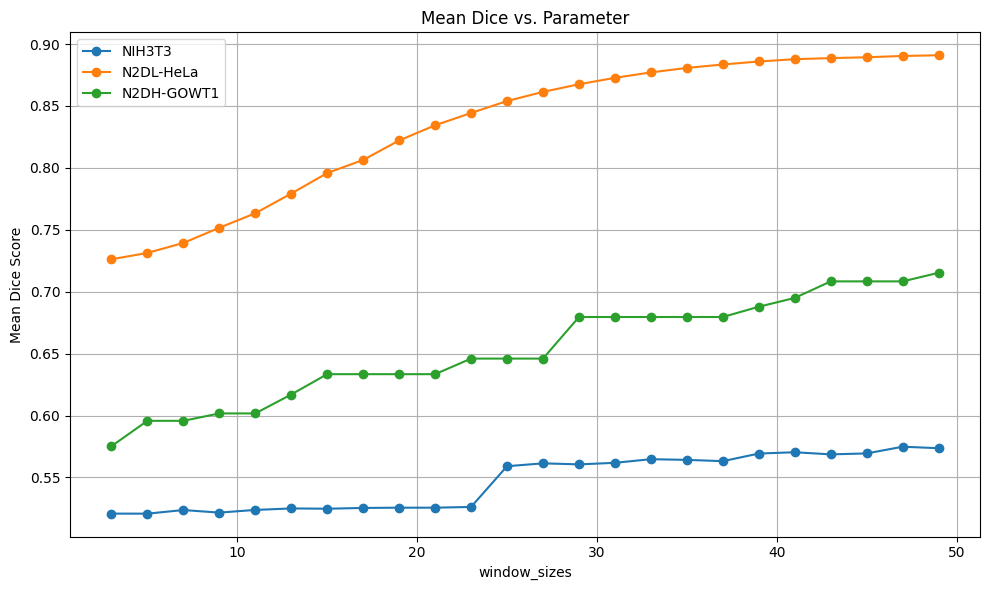

In [ ]:
from src.optimization_meanfilter import find_best_window, plot_all_datasets_means

# Define window sizes (odd sizes)
window_sizes = np.arange(3, 51, 2)

# Define datasets
datasets = [
        ('NIH3T3', load_nih3t3_images),
        ('N2DL-HeLa', load_n2dl_hela_images),
        ('N2DH-GOWT1', load_n2dh_gowt1_images),
    ]

names, _ = zip(*datasets)

# load the results of the upper code
results_meanfilter = np.load(os.path.join(project_root, "output", "all_datasets_dice_means_meanfilter.npy"))

# find best window size
best_window_size, best_mean_dice_score = find_best_window(results_meanfilter, window_sizes=window_sizes)

# plot window size and dice score
plot_all_datasets_means(results_meanfilter, param_values=window_sizes,dataset_names=names, xlabel="window_sizes" )

# NOW WIENER FILTER GIRL


In [ ]:
from src.optimization_wienerfilter import evaluate_datasets_wiener_filter

# Define window sizes (odd sizes)
window_sizes = np.arange(3, 301, 2)
datasets = [
('NIH3T3', load_nih3t3_images),
('N2DL-HeLa', load_n2dl_hela_images),
('N2DH-GOWT1', load_n2dh_gowt1_images),]

results_wiener = evaluate_datasets_wiener_filter(datasets, window_sizes)

In [ ]:
from src.optimization_wienerfilter import find_best_window, plot_all_datasets_means

window_sizes = np.arange(3, 301, 2)

datasets = [
('NIH3T3', load_nih3t3_images),
('N2DL-HeLa', load_n2dl_hela_images),
('N2DH-GOWT1', load_n2dh_gowt1_images),]

names,_ = zip(*datasets)

all_mean = np.load(os.path.join(project_root, "Data pre-processing", "Optimization", "Wiener filter", "Dice_scores", "all_datasets_dice_means_wienerfilter.npy"))

best_window, best_mean_dice_score = find_best_window(all_mean, window_sizes=window_sizes)

plot_all_datasets_means(all_mean, param_values=window_sizes, dataset_names=names, xlabel= "window sizes",
                        title=f"Mean dice vs. window size of wiener filter, optimal window size = {best_window}")